# Urban Greenspace Analytics: Evaluating Public Space Access & Distribution

**Urban Environmental Quality Dimensions**: Access to high-quality public greenspace represents a critical dimension of sustainable urban development, with profound implications for public health, social equity, environmental resilience, and quality of life. This analysis examines two complementary metrics—open space share and urban public access—across global cities to understand distribution patterns, identify best practices, and highlight intervention priorities.

**Analytical Framework for Urban Livability**: Through multi-dimensional visualization and comparative city analysis, we investigate both the absolute levels and relationships between physical greenspace provision and population accessibility. This approach reveals cities achieving excellence in space planning, those facing significant deficits, and those demonstrating imbalances between physical space allocation and population access. The insights provide essential intelligence for urban planners, policymakers, and development institutions seeking to enhance urban environmental quality and spatial justice.

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

# only run this with the above cells, other issues present. 
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# melt data so years are rows not columns 
gini_disposable = gini_disposable.melt(id_vars=["Country", "City/region"], var_name="Year", value_name="Gini")

# convert ".." to proper nulls, then coerce to numeric
gini_disposable = gini_disposable[gini_disposable["Gini"] != ".."]
gini_disposable["Gini"] = pd.to_numeric(gini_disposable["Gini"], errors="coerce")

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_popu = urban_popu.rename(columns={
    'Proportion of urban population living in slums or informal settlements (%) (a)': 'Urban Slum %',
    'Proportion of urban population living in inadequate housing (%) (b)': 'Inadequate Housing %',
    'Country or Territory Name.1': 'Country',
    'Data Reference Year': 'Year',
})

urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access',
    'Country or Territory Name': 'Country',
    'Data Reference Year': 'Year',
})

In [5]:
x = urban_greenspace
display(x.sample(6))
x.info()

,Country,SDG Region,SDG Sub-Region,City Name,Open_Space_Share,Urban_Public_Access,Year
578,Indonesia,Eastern Asia and South-eastern Asia,South-eastern Asia,Banjarmasin,16.638687,45.146125,2020
21,Algeria,Western Asia and Northern Africa,Northern Africa,Mila,13.736608,81.600634,2020
1378,Tunisia,Western Asia and Northern Africa,Northern Africa,Sīdī Bū Zayd (Sidi Bouzid),23.657080,43.797355,2021
1262,Sri Lanka,Central Asia and Southern Asia,Southern Asia,Galle,9.378864,38.397072,2020
1649,Venezuela (Bolivarian Republic of),Latin America and the Caribbean,South America,Altagracia de Orituco,13.432093,46.741236,2020
106,Bahrain,Western Asia and Northern Africa,Western Asia,National,17.800000,NaN,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1711 non-null   object 
 1   SDG Region           1697 non-null   object 
 2   SDG Sub-Region       1697 non-null   object 
 3   City Name            1697 non-null   object 
 4   Open_Space_Share     1512 non-null   float64
 5   Urban_Public_Access  1562 non-null   float64
 6   Year                 1711 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 93.7+ KB


## Data Architecture: Urban Greenspace Metrics & Measurement Framework

**Dual Metric Approach**: The urban greenspace dataset provides two complementary measurements that capture different dimensions of urban environmental quality: "Open_Space_Share" quantifies the physical allocation of urban land to public spaces (a supply-side metric), while "Urban_Public_Access" measures the proportion of population with convenient access to these spaces (a demand-side metric). Together, these indicators provide a comprehensive view of both spatial provision and functional accessibility.

**Geographic Granularity & Coverage**: The dataset provides city-level observations across diverse global regions and development contexts, enabling identification of outliers, patterns, and best practices across different urban planning traditions and economic conditions. This granular city-level approach transcends national averages to reveal specific urban centers achieving excellence or facing challenges in public space provision, offering actionable intelligence for targeted policy interventions and cross-city learning.

SDG Region
Western Asia and Northern Africa     368
Latin America and the Caribbean      345
Northern America and Europe          328
Central Asia and Southern Asia       247
Sub-Saharan Africa                   202
Name: count, dtype: int64


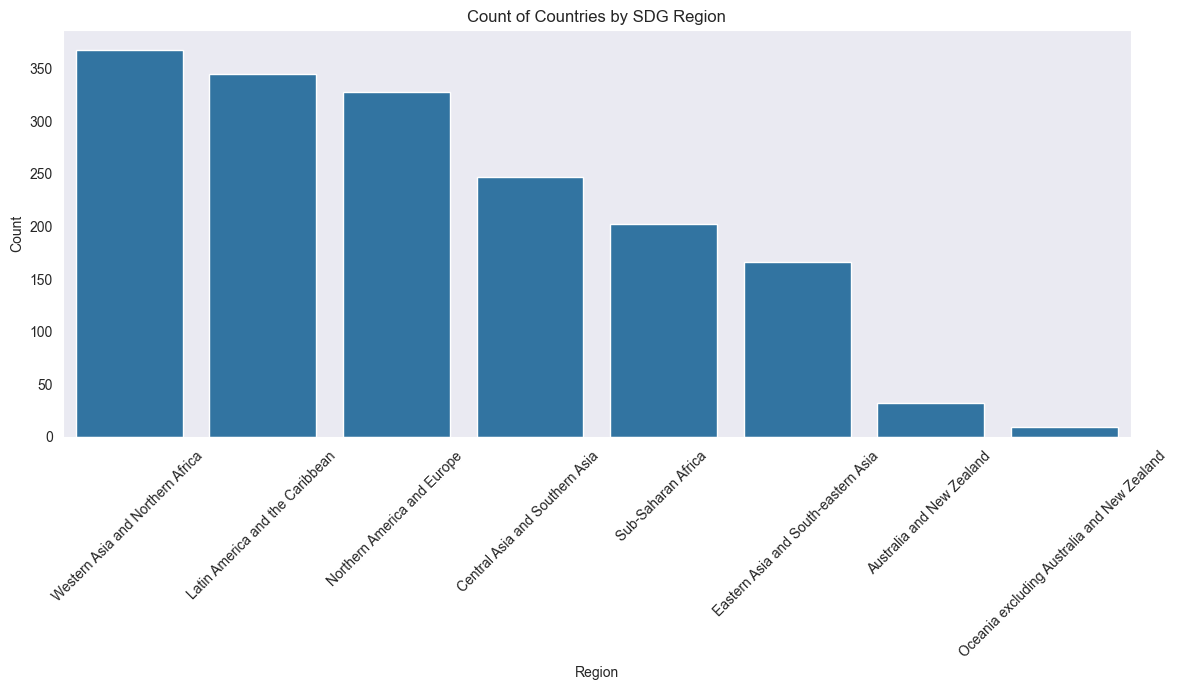

In [39]:
df = urban_greenspace.copy()

# count data to see region variety
print(df['SDG Region'].value_counts().head())

# plot them to see
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='SDG Region', order=df['SDG Region'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Countries by SDG Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Geographic Coverage Assessment: Regional Distribution of Urban Greenspace Data

**Regional Representation Analysis**: The distribution of observations across SDG regions reveals important patterns in data coverage and monitoring intensity. This analysis exposes whether our understanding of urban greenspace is balanced across global regions or potentially biased toward specific geographic areas, with implications for the generalizability of findings and identification of data gaps requiring additional research attention.

**Measurement Capacity Indicators**: The regional observation counts serve as proxies for urban environmental monitoring capacity and priorities across different parts of the world. Regions with robust data coverage demonstrate both technical capacity and policy prioritization of urban environmental quality measurement, while underrepresented regions may face monitoring challenges that hinder evidence-based policy development. Understanding these patterns helps contextualize findings and identify where capacity building for environmental monitoring may be most needed.

Country
Türkiye                               120
Mexico                                 81
India                                  64
United States of America               59
Brazil                                 57
Tunisia                                46
China                                  35
Iran (Islamic Republic of)             33
Pakistan                               31
Indonesia                              29
Russian Federation                     28
Venezuela (Bolivarian Republic of)     28
Argentina                              26
Japan                                  26
Norway                                 22
Australia                              22
Peru                                   21
Poland                                 21
Israel                                 20
France                                 20
Morocco                                19
Algeria                                19
Uzbekistan                             19
Kazakhstan                

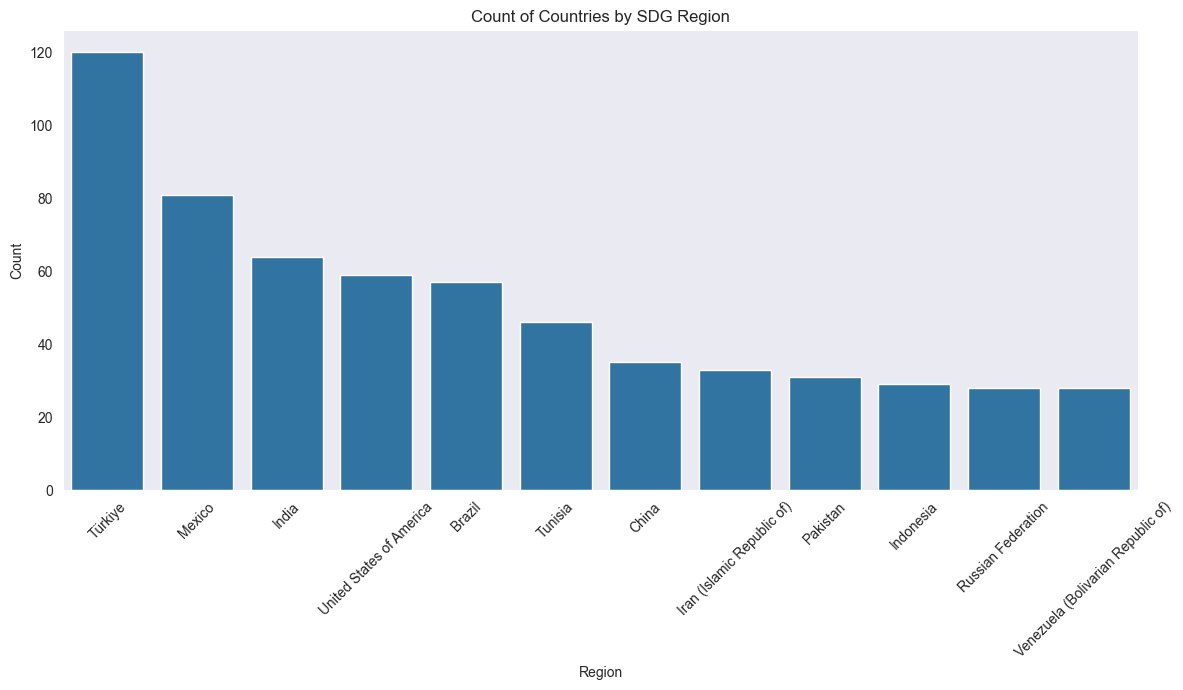

In [43]:
df = urban_greenspace.copy()

# count data to see region variety
print(df['Country'].value_counts().head(25))

# plot them to see
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().head(12).index)
plt.xticks(rotation=45)
plt.title('Count of Countries by SDG Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

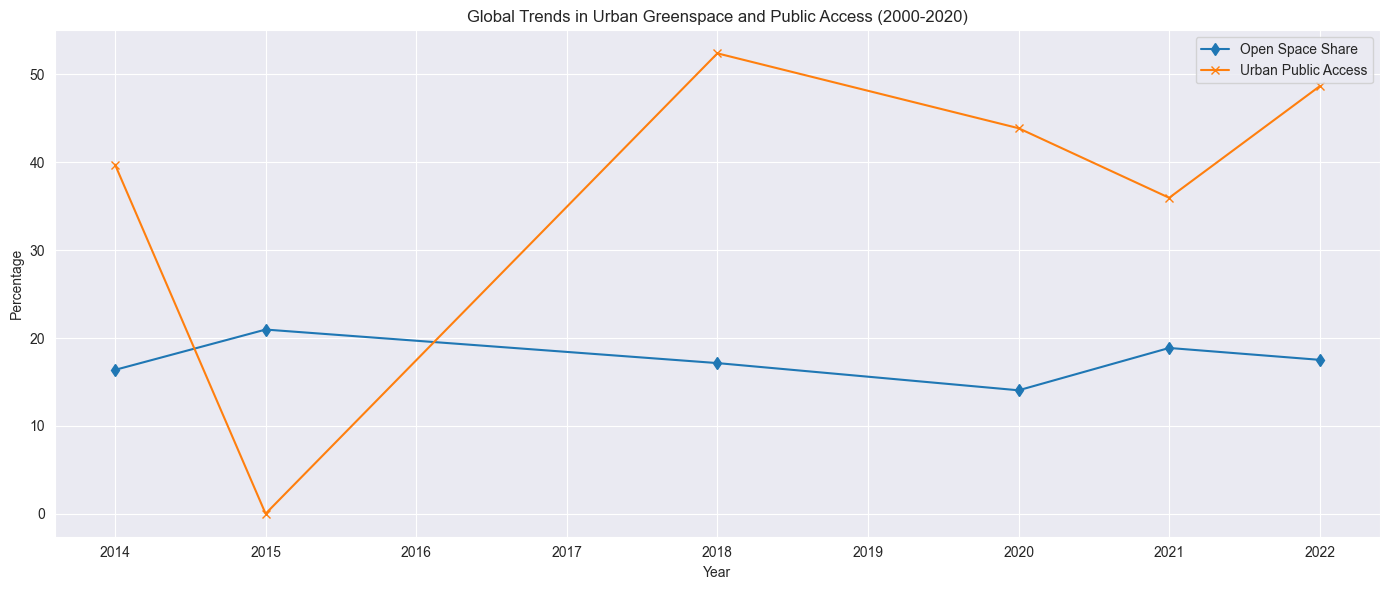

In [29]:
# re-copy data for cleanliness. 
df = urban_greenspace.copy()

# combine data and find mean for global and annual figures for lineplot
yearly = (df.fillna(0).groupby('Year')[['Open_Space_Share', 'Urban_Public_Access']].mean().reset_index())

# build plot
sns.set_style("dark")
plt.figure(figsize=(14, 6))
plt.plot(yearly['Year'], yearly['Open_Space_Share'], label='Open Space Share', marker='d')
plt.plot(yearly['Year'], yearly['Urban_Public_Access'], label='Urban Public Access', marker='x')

# finesse
plt.title('Global Trends in Urban Greenspace and Public Access (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Temporal Analysis: Global Trends in Urban Greenspace Provision & Access

**Longitudinal Performance Assessment**: The global trend analysis reveals how urban greenspace provision and accessibility have evolved over the past two decades, providing critical insight into whether worldwide urbanization is becoming more or less environmentally sustainable. These trends serve as a macro-level indicator of collective progress toward SDG 11 targets for inclusive, safe, resilient, and sustainable cities, showing whether global policy frameworks and urban development patterns are advancing environmental quality.

**Metric Convergence Analysis**: The parallel tracking of both physical space allocation and population access metrics over time exposes whether these dimensions are advancing in tandem or diverging. Convergent improvement would suggest holistic urban planning approaches that balance physical space creation with accessibility considerations, while divergence might indicate imbalanced approaches that prioritize one dimension without adequate attention to the other. This analysis provides essential intelligence for refining global urban sustainability frameworks and identifying policy blindspots.

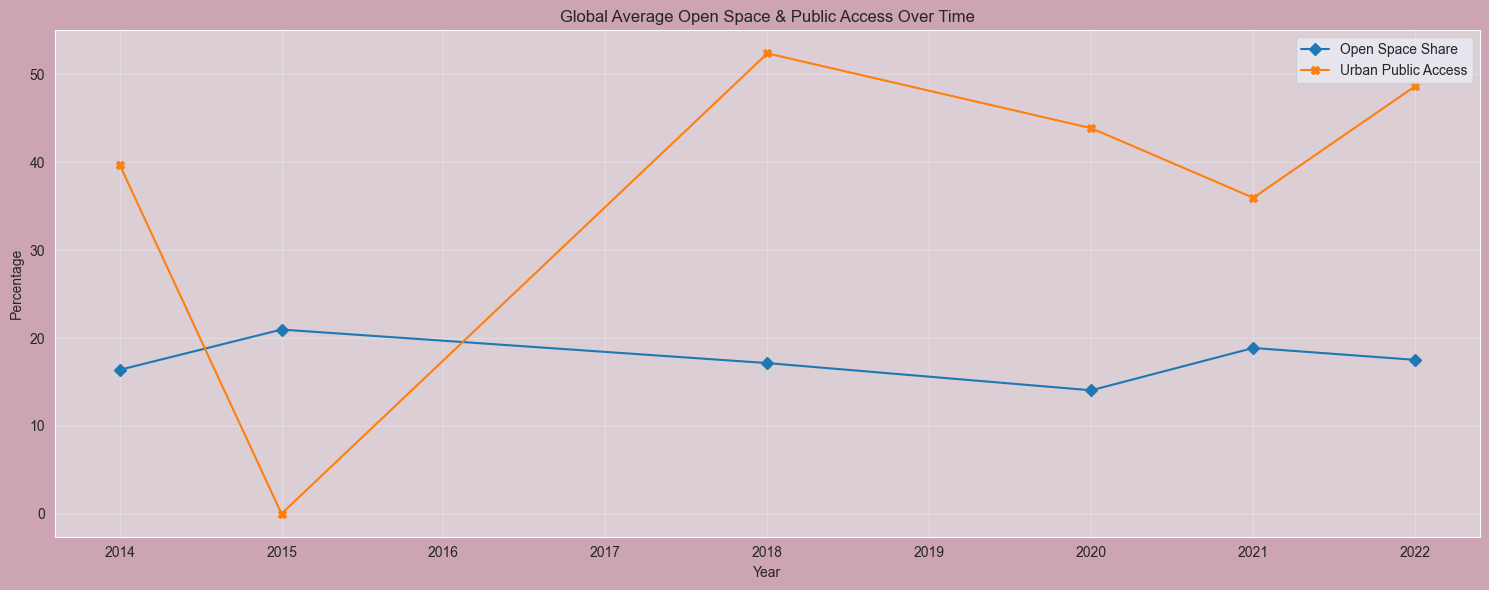

In [64]:
# graphing the same thing, but let's trial a different style
# Create a figure with a custom background
fig, ax = plt.subplots(figsize=(15,6))
fig.patch.set_facecolor("#cca4b4")   # very light grey-pink for outside plot area
ax.set_facecolor("#dbced5")          # slightly lighter for inside plot area

# Example plotting
ax.plot(yearly['Year'], yearly['Open_Space_Share'], marker='D', label='Open Space Share')
ax.plot(yearly['Year'], yearly['Urban_Public_Access'], marker='X', label='Urban Public Access')

ax.set_title('Global Average Open Space & Public Access Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

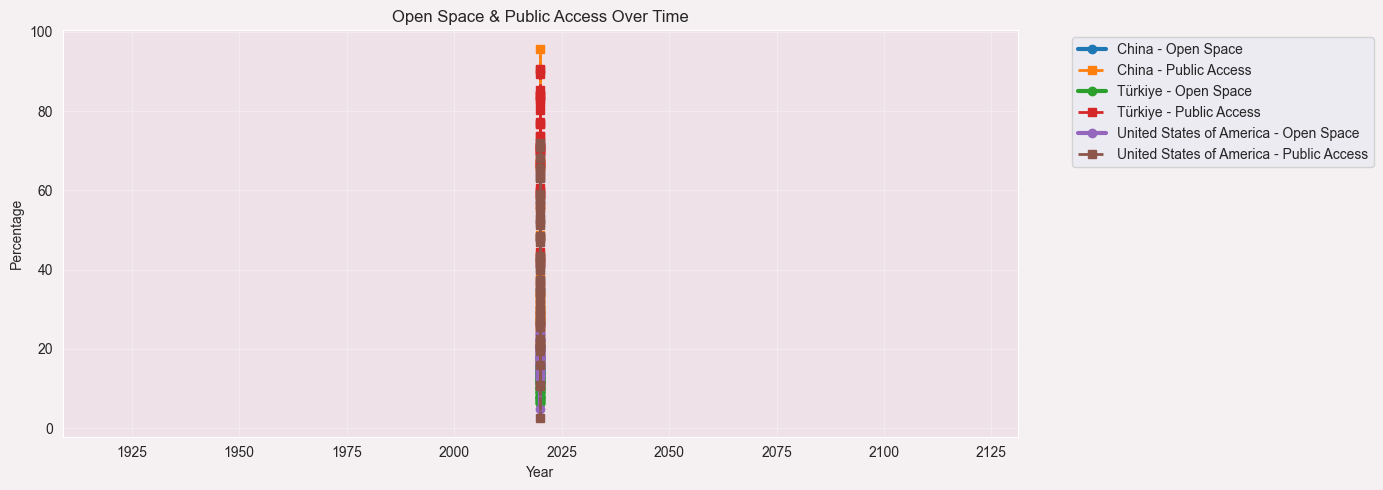

Oops ! Looks like all this data is based on 2020 data, this dataset is thus way too limited for meaningful analysis on a per country level


In [66]:
# Choose countries
countries = ['United States of America', 'China', 'Türkiye']

# Filter & ensure year is numeric
df_country = df[df['Country'].isin(countries)].copy()
df_country['Year'] = pd.to_numeric(df_country['Year'], errors='coerce')

# Plot
fig, ax = plt.subplots(figsize=(14,5))
fig.patch.set_facecolor('#f5f0f2')
ax.set_facecolor("#efe1e8")

for country, g in df_country.groupby('Country'):
    g = g.sort_values('Year')
    ax.plot(g['Year'], g['Open_Space_Share'], marker='o', linewidth=3, label=f"{country} - Open Space")
    ax.plot(g['Year'], g['Urban_Public_Access'], marker='s', linewidth=2, linestyle='--', label=f"{country} - Public Access")

ax.set_title('Open Space & Public Access Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Oops ! Looks like all this data is based on 2020 data, this dataset is thus way too limited for meaningful analysis on a per country level")

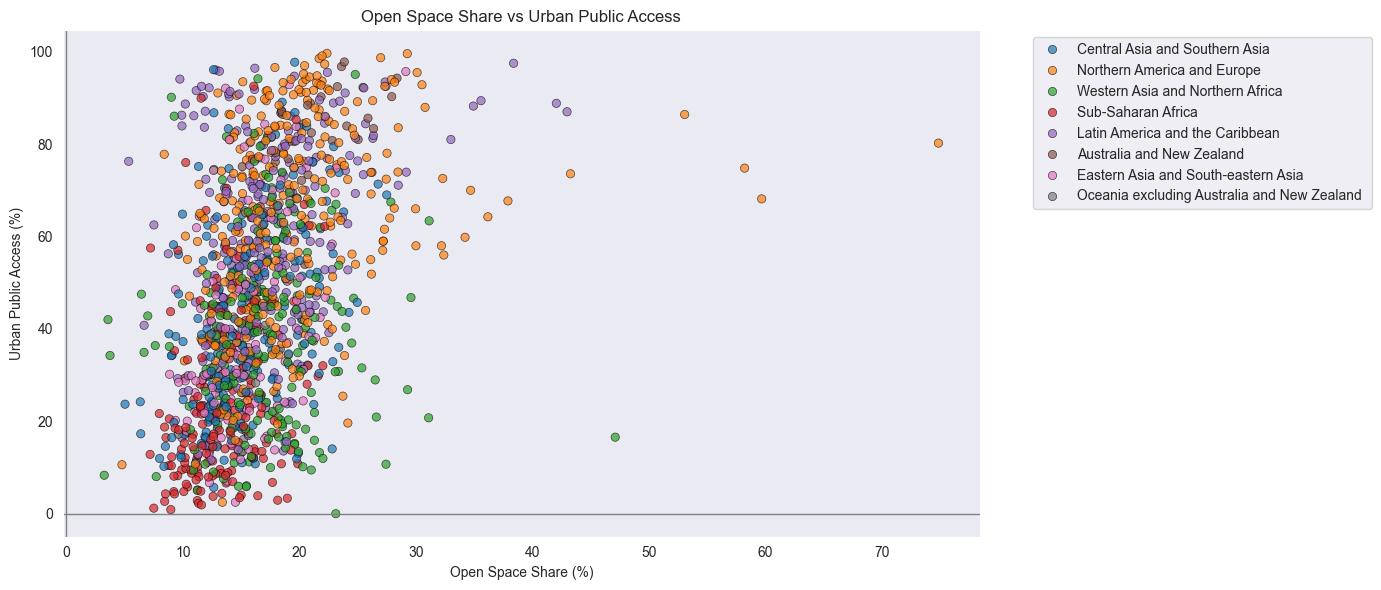

In [68]:
plt.figure(figsize=(14,6))
sns.scatterplot(
    data=urban_greenspace,
    x='Open_Space_Share',
    y='Urban_Public_Access',
    hue='SDG Region',
    alpha=0.7,
    edgecolor='black'
)
plt.title('Open Space Share vs Urban Public Access')
plt.xlabel('Open Space Share (%)')
plt.ylabel('Urban Public Access (%)')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Relationship Analysis: Spatial Provision vs Population Access Correlations

**Provision-Access Relationship Assessment**: The scatter plot visualization reveals the complex relationship between physical space allocation (Open Space Share) and population accessibility (Urban Public Access) across cities and regions. This analysis exposes whether these metrics are generally correlated (suggesting balanced urban planning approaches) or whether significant outliers exist where generous space allocation doesn't translate to proportional access or where limited space is efficiently distributed for maximum accessibility.

**Regional Pattern Identification**: The regional clustering of observations provides insight into whether different urban planning traditions and development contexts lead to distinctive patterns in the provision-access relationship. Some regions may demonstrate consistently balanced approaches while others might show systematic imbalances in one direction or another. Understanding these patterns provides valuable context for tailoring policy interventions to the specific challenges faced in different regional urban development contexts, enabling more nuanced and effective urban environmental policy frameworks.

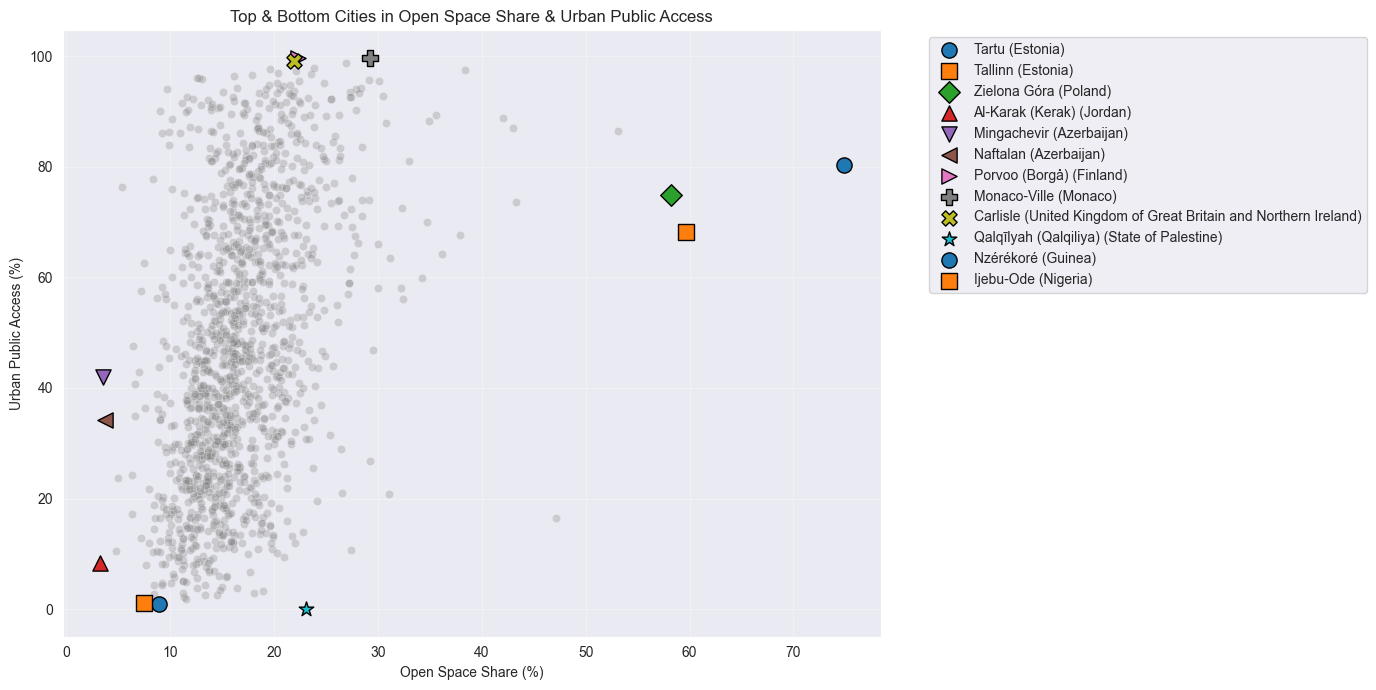

In [74]:
# Clean data
df_clean = urban_greenspace.dropna(subset=['Open_Space_Share', 'Urban_Public_Access']).copy()

# Helper: top & bottom N for a column
def top_bottom(df, column, n=3):
    return pd.concat([df.nlargest(n, column), df.nsmallest(n, column)])

# Get extremes for both metrics
extremes_os = top_bottom(df_clean, 'Open_Space_Share')
extremes_ua = top_bottom(df_clean, 'Urban_Public_Access')

# Combine unique rows
extremes = pd.concat([extremes_os, extremes_ua]).drop_duplicates()

# Marker styles to rotate through
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
colors = sns.color_palette("tab10", n_colors=len(extremes))

# Create scatterplot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_clean,
    x='Open_Space_Share',
    y='Urban_Public_Access',
    color='grey',
    alpha=0.3
)

# Plot each extreme city with unique color+marker
for (i, (_, row)) in enumerate(extremes.iterrows()):
    plt.scatter(
        row['Open_Space_Share'],
        row['Urban_Public_Access'],
        s=120,
        edgecolor='black',
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        label=f"{row['City Name']} ({row['Country']})"
    )

plt.title("Top & Bottom Cities in Open Space Share & Urban Public Access")
plt.xlabel("Open Space Share (%)")
plt.ylabel("Urban Public Access (%)")

# Unique legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Best & Worst Practices: Identifying Urban Greenspace Champions & Challenges

**Extreme Case Analysis**: The outlier identification approach highlights cities representing both excellence and concerning deficits in urban greenspace provision and accessibility. These extreme cases serve as critical learning opportunities: top performers provide templates for successful urban environmental design and policy, while cities with severe deficits represent priority intervention areas requiring targeted support and policy reform.

**Typology of Excellence & Challenge**: The visual classification of cities into quadrants based on their performance across both metrics creates a meaningful typology of urban greenspace outcomes: cities in the upper-right quadrant demonstrate excellence in both spatial provision and accessibility (comprehensive success); those in the upper-left show efficient distribution of limited space (accessibility optimization); those in the lower-right have abundant space with limited accessibility (distribution challenges); and those in the lower-left face comprehensive deficits requiring multi-dimensional intervention. This framework provides essential strategic intelligence for tailoring urban environmental interventions to the specific patterns of strengths and challenges in different cities.

## Strategic Synthesis: Urban Greenspace Intelligence for Sustainable Development

**Comprehensive Pattern Recognition**: This analysis reveals several critical patterns in global urban greenspace provision and accessibility. First, there exists substantial variation across cities and regions in both metrics, suggesting that urban environmental quality remains highly uneven despite growing global sustainability commitments. Second, the relationship between physical space allocation and population accessibility is not consistently strong, indicating that many cities struggle with the equitable distribution of available greenspace. Third, temporal trends show modest but inconsistent improvement globally, with some regions advancing more rapidly than others in addressing urban environmental deficits.

**Policy and Planning Implications**: The findings provide several strategic imperatives for urban sustainability policy. Cities demonstrating excellence in both provision and access offer valuable case studies of integrated urban planning approaches that successfully balance spatial allocation with accessibility considerations. The identification of cities with severe deficits in either or both dimensions highlights priority intervention areas requiring targeted policy reform and investment. The correlation analysis further suggests that many cities need to focus not just on increasing absolute greenspace quantity, but on strategic location and distribution to maximize population access—especially in dense urban environments with limited space for expansion.

**Future Research and Monitoring Priorities**: To advance understanding and policy effectiveness in urban environmental quality, several priorities emerge from this analysis. First, expanding data collection in underrepresented regions is essential for a truly global understanding of urban greenspace patterns. Second, more granular intra-city distribution analysis would help identify neighborhood-level inequities in greenspace access that may be obscured by city-wide averages. Finally, integrating quality metrics beyond quantity and access—such as greenspace ecological health, maintenance quality, and safety—would provide a more comprehensive assessment of urban environmental performance. These enhancements would strengthen the evidence base for designing and implementing urban policies that maximize the health, social, environmental, and economic benefits of equitably distributed, high-quality urban greenspace.